In [1]:
import os
from os import listdir
from os.path import isfile, join

import numpy as np
import tensorflow as tf
import tifffile as tif
from cellpose import models, utils
from tqdm import tqdm
import matplotlib.pyplot as plt

DATASETS = {
    "hadv": "/bigdata/casus/MLID/maria/VIRVS_data/HADV/processed/test",
    "iav": "/bigdata/casus/MLID/maria/VIRVS_data/IAV/processed/test",
    "hsv": "/bigdata/casus/MLID/maria/VIRVS_data/HSV/processed/test",
    "rv": "/bigdata/casus/MLID/maria/VIRVS_data/RV/processed/test",
}


DIAMETERS = {
    "hadv": None,
    "hsv": 7,
    "iav": 7,
    "rv": 7,
}

tf.random.set_seed(42)
model = models.CellposeModel(model_type="cyto3")

2024-08-18 16:58:57.740466: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 16:58:57.740549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 16:58:58.190735: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-18 16:58:59.220780: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-18 16:59:10.907065: W tensorflow/comp

In [2]:
virus = 'hadv'
masks = []
path = f"{DATASETS[virus]}"
filenames = [f for f in listdir(join(path, "x")) if isfile(join(path, "x", f))]
for f in tqdm(filenames):
    x = tif.imread(join(path, "x", f))[..., 0]
    masks_pred, flows, _ = model.eval(
        x, channels=[0, 0], diameter=None
    )
    masks.append(masks_pred)
    break

  0%|          | 0/59 [01:06<?, ?it/s]


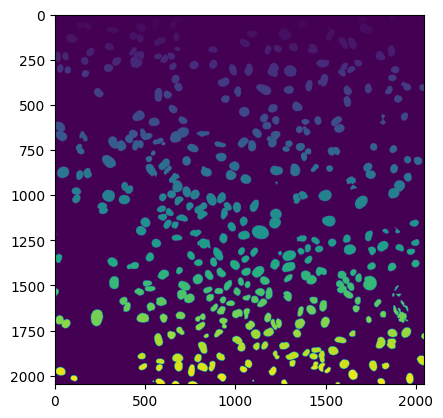

In [3]:
plt.imshow(masks_pred)

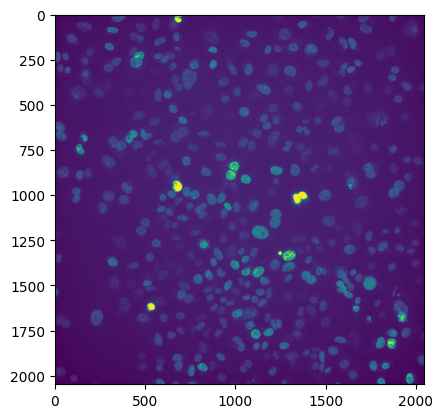

In [4]:
plt.imshow(x)

In [5]:
virus = 'hsv'
masks = []
path = f"{DATASETS[virus]}"
filenames = [f for f in listdir(join(path, "x")) if isfile(join(path, "x", f))]
for f in tqdm(filenames):
    x = tif.imread(join(path, "x", f))[..., 0][:512, :512]
    masks_pred, flows, _ = model.eval(
        x, channels=[0, 0], diameter=6
    )
    masks.append(masks_pred)
    break

  0%|          | 0/96 [01:33<?, ?it/s]


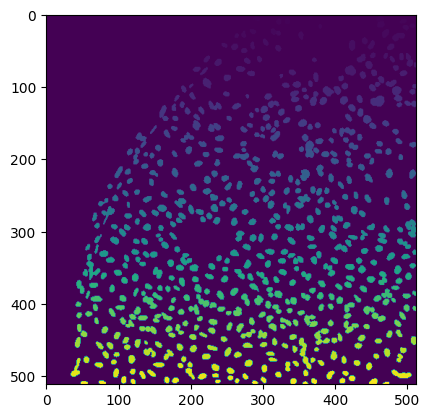

In [6]:
plt.imshow(masks_pred)

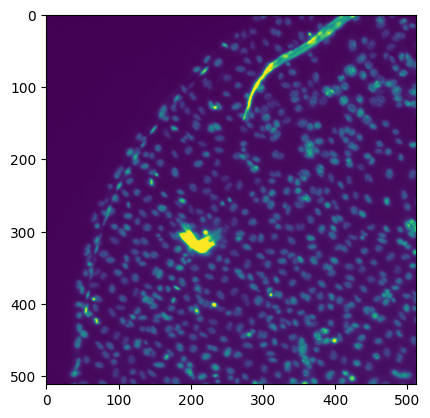

In [7]:
plt.imshow(x)

In [8]:
virus = 'iav'
masks = []
path = f"{DATASETS[virus]}"
filenames = [f for f in listdir(join(path, "x")) if isfile(join(path, "x", f))]
for f in tqdm(filenames):
    x = tif.imread(join(path, "x", f))[..., 0][:512, :512]
    masks_pred, flows, _ = model.eval(
        x, channels=[0, 0], diameter=6
    )
    masks.append(masks_pred)
    break

  0%|          | 0/90 [01:33<?, ?it/s]


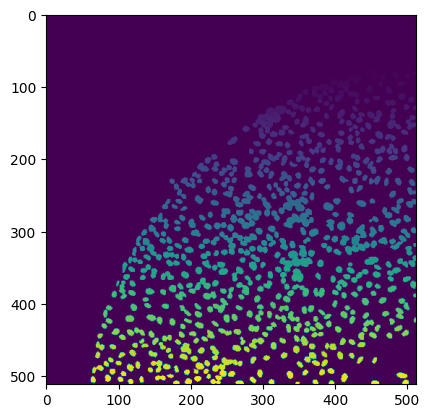

In [9]:
plt.imshow(masks_pred)

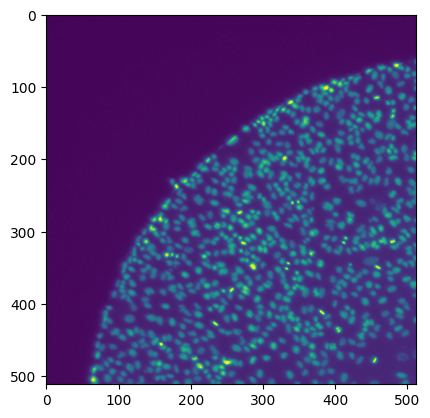

In [10]:
plt.imshow(x)

In [11]:
virus = 'rv'
masks = []
path = f"{DATASETS[virus]}"
filenames = [f for f in listdir(join(path, "x")) if isfile(join(path, "x", f))]
for f in tqdm(filenames):
    x = tif.imread(join(path, "x", f))[..., 0][:512, :512]
    masks_pred, flows, _ = model.eval(
        x, channels=[0, 0], diameter=6
    )
    masks.append(masks_pred)
    break

  0%|          | 0/77 [01:34<?, ?it/s]


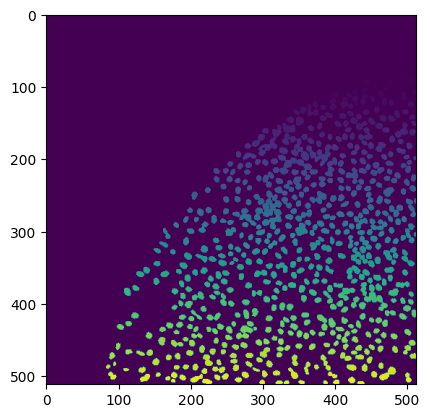

In [12]:
plt.imshow(masks_pred)

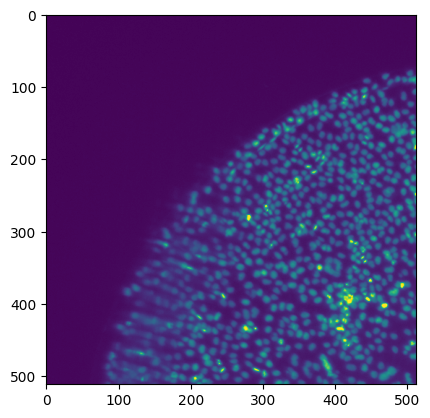

In [13]:
plt.imshow(x)

In [27]:
virus = 'hadv'
masks = []
path = f"{DATASETS[virus]}"
filenames = [f for f in listdir(join(path, "x")) if isfile(join(path, "x", f))]
for f in tqdm(filenames):
    x = tif.imread(join(path, "x", f))
    x = np.dstack((x[...,1], x[..., 0], x[..., 0]))
    
    masks_pred, flows, _ = model.eval(
        x, channels=[1, 2], diameter=70
    )
    masks.append(masks_pred)
    break

  0%|          | 0/59 [01:27<?, ?it/s]


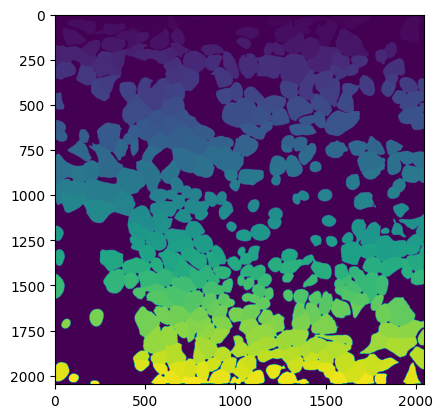

In [28]:
plt.imshow(masks_pred)

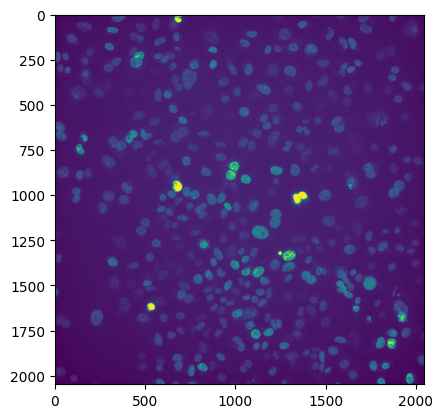

In [29]:
plt.imshow(x[...,0])